# 파이썬을 이용한 자연어 처리 기초

* 참고 : https://www.lucypark.kr/courses/2015-dm/text-mining.html
* 발표 : 딥사이어인 파트3 김성동

## 패키지 임포트 

In [3]:
# coding=utf-8
from __future__ import unicode_literals
from konlpy.utils import pprint
%matplotlib inline

## NLP 용어 정리 

* Document : 문서
* Copus : 말뭉치(문서들의 집합)
* Token : 토큰(단어, 어절, 상징과 같은 텍스트의 의미있는 원소)
* Morphemes : 형태소 (언어의 가장 작으면서 의미있는 단위)
* Phoneme : 음소/음절
* Syntax : 구문론(문법)
* Semantic : 의미론
* POS : 품사 (Part-Of-Speech) ex. Noun/명사

# Language Modeling 

__Probabilistic language model__ : 문장에 확률을 부여한다.<br>

<br>
$$ P(S) = P(w_1,w_2,w_3,...w_n) $$

* 다음 단어 예측 :  $ P(w_n|w_1,w_2,...,w_{n-1}) $ <br>


### Uses of Lanuage Models

- Speech recognition
- Text generation
- Spelling correction
- Machine translation
- Other uses(Document classification, summarization, OCR)

<br>
후에 translation model로 연결된다.

문장의 확률을 chain rule을 이용해 구해낸다. 하지만 이는 많은 양의 연산을 요구한다.

## N-gram Models 

* 이전 단어들에 기반하여 단어의 확률을 예측한다.<br> ex. P(square | Let's meet in Times)
* Markov assumption : Only look at limited history
* N-gram models
<br>
Unigram - no context: P(square) <br>
Bigram: P(sqaure | Times) <br>
Trigram: P(square | in Times)
<hr>
N-grams are just one way to represent weighted regular languages. ( HMM's are equivalent to weighted finite state transitions)

### 셰익스피어  

- unigrams : 29,524개의 타입, 대략 900,000 토큰
- bigrams: 346,097 타입, 대략 900,000 토큰
<br>
__Notice - very saprse data!__

### Estimation

데이터가 매우 sparse하기 때문에 곧바로 조건부 확률을 계산해낼 수는 없고,
마코프 가정을 통해 추정
<br>
하지만 트레이닝 코퍼스에만 적합하는 경향이 있고 일반화하기 어렵다..!<br>
<br>
* Engineering Trick : MLE은 보통 10^-6 정도이다. 이를 단어별로 다 곱하면 (예를 들어 단어 20개) 10^-120을 얻을 것이다. 이는 언더 플로우를 발생시킨다. 이를 위해 __logarithm__을 사용하라.
ex) 10^-6 -> -6 (products 대신 sums을 사용)

### Smoothing

만약 단어의 사이즈가 약 백만개라면 unigram으로 추정할 파라미터들이 너무 많아진다. 또한 처음 보는 데이터(문장)에 대해 MLE는 거의 0의 값을 할당할 것이다. 만약 bigram, trigram을 사용하면 그 수는 더욱 증가할 것이다.
<br>
<br>
* Smoothing(regularization) : unseen data(본 적 없는 데이터)에 대해 어떤 확률로 재할당하는 것.
<br>
* Add-one (Laplace) smoothing:
<br>  Bigrams: $$ P(w_i | w_{i-1}) = (c(w_{i-1},w_i)+1)/(c(w_{i-1})+V) $$ <br>
하지만 이러한 방식은 unseen data에 대해 많은 value를 주게 될 수도

### Example 

* Corpus : "cat dog cat rabbit mouse fish fish mouse hamster hamster fish turtle tiger cat rabbit cat dog dog fox lion"
<br><br>
* 다음 아이템이 "mouse"일 확률? : $P_{MLE}(mouse)$ = 2/20
* 본 적 없는 "elephant" 같은 단어가 다음 아이템일 확률은? : 0/20??, 하지만 P(next animal is unseen) > 0 는 확실, 그렇기에 우리는 봤던 동물의 확률 역시 낮출 필요가 있다..? $P_{MLE}(mouse)$ < 2/20 <br>
<br> => Good Turing

### 데이터가 sparse할 때 => Backoff, Interpolation

### Evaluation of LM

* Extrinsic : Use in an application
* Intrinsic : Cheaper
* Correlate the two for validation purposes(하나가 다른 하나를 완전히 대체할 순 없다. 상호보완적으로 사용해야 함)

### Perplexity(Intrinsic)

* Does the model fit the data? : A good model will give a high probability to a real sentence <br>
* Perplexity : Average __branching factor__ in predicting the next word, 작을수록 좋다. (lower perplexity -> higher probability),
N = number of words

$$ Per = n\sqrt{\frac{1}{P(w_1,w_2,...,w_n)}} $$
<br>
<br>
$$ Per = 2^{-(1/N) \sum_xlog_2 p(w_i)} $$
<br>
<br>
$$ Cross-entory : H(p,q) = \sum_x p(x)logq(x) $$

### Word Error Rate

실제와 예측 문장을 비교하여 서로 맞게 해줄 때 몇번을 삽입, 삭제, 대체해야하는지를 본다.

### Issues

* out of vocabulary : <unk> 사용
* Clustering : 날짜, 단위, 조직, 연도 등은 하나로 통일해준다.
* Long (distance)term dependency : LM은 하나나 두 단어 앞만 보기 때문에 영향을 주는 단어 간의 거리가 멀어지면 예측에 실패한다..(구문적, 의미적 정보를 잊게 된다.)<br>
ex) __The students__ who participated in the game __are__ tired

## 리스트 자료구조

### 선언 및 초기화 

In [15]:
myList = [1,2,3,4]
print myList

[1, 2, 3, 4]


### 인덱싱 

In [14]:
print myList[0] # indexing
print myList[0:3]
print myList[:-1]

1
[1, 2, 3]
[1, 2, 3, 4]


### 관련 함수 

https://wikidocs.net/14  # 더 자세한 내용은 링크 참고

In [17]:
myList.append(5) # 리스트에 element 추가
print myList

[1, 2, 3, 4, 5]


In [18]:
myList.pop() # 해당 위치의 element 꺼내기(default = -1)

5

In [19]:
len(myList) # 리스트의 element 갯수 

4

### List Comprehension

파이썬은 "list comprehensions"이라는 기능을 제공한다. list 전 element에 공통적 연산을 수행하는 것을 한 줄로 표현 가능

In [22]:
S = [x**2 for x in range(10)]
print S

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [23]:
V = [2**i for i in range(13)]
print V

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]


In [24]:
M = [x for x in S if x % 2 == 0]
print M

[0, 4, 16, 36, 64]


## 튜플 

리스트와는 달리 생성, 수정 및 삭제가 안된다.

In [42]:
tuple_ = (1,2,3)
list_ = [1,2,3]

In [47]:
for i in range(3):
    print "tuple: ", tuple_[i], " list: ", list_[i]

tuple:  1  list:  1
tuple:  2  list:  2
tuple:  3  list:  3


In [49]:
list_[0] = 4
list_

[4, 2, 3]

In [50]:
tuple_[0] = 4
tuple_

TypeError: 'tuple' object does not support item assignment

## 딕셔너리 

key와 value를 한 쌍으로 item을 구성하며, key는 중복될 수 없다.

In [52]:
dic = {}
dic = {'hi' : 1, 'hello' : 2}

In [53]:
dic['hi']

1

In [54]:
dic.items()

[(u'hi', 1), (u'hello', 2)]

## Sentence as List

자연어처리를 할 때는 문장을 리스트로 표현하여 처리한다.

In [2]:
s1 = "나는 파이썬을 공부하기 위해 파이썬을 설치하고 파이썬책을 구매했습니다."

In [4]:
type(s1)

unicode

### Tokenize 

문장을 리스트로 표현하기 전 의미있는 단위인 토큰으로 나눠줘야 한다. 토큰을 어떤 단위로 할 것인가는 분석의 목적에 따라 달라지지만 보통 __어절(띄어쓰기 기준)__ 혹은 __형태소__를 기준으로 토큰화를 수행한다. <br>
<br>
또한 품사태깅을 통해 동음이의어의 문제를 피하고 좀 더 정교한 예측을 할 수 있다.

In [5]:
token1 = s1.split(' ') #띄어쓰기 기준으로 토큰화하기
pprint(token1)

[나는,
 파이썬을,
 공부하기,
 위해,
 파이썬을,
 설치하고,
 파이썬책을,
 구매했습니다.]


In [6]:
import nltk
from konlpy.tag import Twitter 
t = Twitter()
token2 = t.morphs(s1) # 형태소 기준으로 토큰화하기

In [7]:
print '하이'

하이


In [18]:
pprint(token2)

[나,
 는,
 파이썬,
 을,
 공부,
 하기,
 위해,
 파이썬,
 을,
 설치하고,
 파이썬,
 책,
 을,
 구매,
 했,
 습니다,
 .]


In [9]:
bigram_tuples = list(nltk.bigrams(token2))
trigram_tuples = list(nltk.trigrams(token2))

In [10]:
pprint(bigram_tuples)
pprint(trigram_tuples)

[(나, 는),
 (는, 파이썬),
 (파이썬, 을),
 (을, 공부),
 (공부, 하기),
 (하기, 위해),
 (위해, 파이썬),
 (파이썬, 을),
 (을, 설치하고),
 (설치하고, 파이썬),
 (파이썬, 책),
 (책, 을),
 (을, 구매),
 (구매, 했),
 (했, 습니다),
 (습니다, .)]
[(나, 는, 파이썬),
 (는, 파이썬, 을),
 (파이썬, 을, 공부),
 (을, 공부, 하기),
 (공부, 하기, 위해),
 (하기, 위해, 파이썬),
 (위해, 파이썬, 을),
 (파이썬, 을, 설치하고),
 (을, 설치하고, 파이썬),
 (설치하고, 파이썬, 책),
 (파이썬, 책, 을),
 (책, 을, 구매),
 (을, 구매, 했),
 (구매, 했, 습니다),
 (했, 습니다, .)]


In [11]:
count = {item : bigram_tuples.count(item) for item in set(bigram_tuples)} 

In [12]:
pprint(count.items())

[((구매, 했), 1),
 ((하기, 위해), 1),
 ((파이썬, 책), 1),
 ((공부, 하기), 1),
 ((파이썬, 을), 2),
 ((설치하고, 파이썬), 1),
 ((위해, 파이썬), 1),
 ((책, 을), 1),
 ((는, 파이썬), 1),
 ((습니다, .), 1),
 ((나, 는), 1),
 ((을, 구매), 1),
 ((을, 공부), 1),
 ((을, 설치하고), 1),
 ((했, 습니다), 1)]


In [25]:
default_tagger = nltk.DefaultTagger('NN')
tagged_sentence = default_tagger.tag(token2)

In [26]:
pprint(tagged_sentence)

[(나, NN),
 (는, NN),
 (파이썬, NN),
 (을, NN),
 (공부, NN),
 (하기, NN),
 (위해, NN),
 (파이썬, NN),
 (을, NN),
 (설치하고, NN),
 (파이썬, NN),
 (책, NN),
 (을, NN),
 (구매, NN),
 (했, NN),
 (습니다, NN),
 (., NN)]


In [13]:
tags_ko = t.pos(s1)

In [14]:
pprint(tags_ko)

[(나, Noun),
 (는, Josa),
 (파이썬, Noun),
 (을, Josa),
 (공부, Noun),
 (하기, Verb),
 (위해, Noun),
 (파이썬, Noun),
 (을, Josa),
 (설치하고, Verb),
 (파이썬, Noun),
 (책, Noun),
 (을, Josa),
 (구매, Noun),
 (했, Verb),
 (습니다, Eomi),
 (., Punctuation)]


### 참고 : 품사의 종류 FROM 국립국어원 언어정보나눔터

* NNG(일반 명사)
* NNP(고유 명사)
* NNB(의존 명사)
* NR(수사)
* NP(대명사)
* VV(동사)
* VA(형용사)
* VX(보조 용언)
* VCP(긍정 지정사)
* VCN(부정 지정사)
* MM(관형사)
* MAG(일반 부사)
* MAJ(접속 부사)
* IC(감탄사)
* JKS(주격 조사)
* JKC(보격 조사)
* JKG(관형격 조사)
* JKO(목적격 조사)
* JKB(부사격 조사)
* JKV(호격 조사)
* JKQ(인용격 조사)
* JX(보조사)
* JC(접속 조사)
* EP(선어말 어미)
* EC(연결 어미)
* ETN(명사형 전성 어미)
* ETM(관형형 전성 어미)
* XPN(체언 접두사)
* XSN(명사 파생 접미사)
* XSV(동사 파생 접미사)
* XSA(형용사 파생 접미사)
* XR(어근)
* SF(마침표, 물음표, 느낌표)
* SP(쉼표, 가운뎃점, 콜론, 빗금)
* SS(따옴표, 괄호표, 줄표)
* SE(줄임표)
* SO(붙임표(물결, 숨김, 빠짐))
* SW(기타기호 (논리수학기호, 화폐기호))
* NA(분석불능범주)
* SL(외국어)
* SH(한자)
* SN(숫자)
* NF(명사추정범주)
* NV(용언추정범주)

# Text exploration 

## 1. Read document 

이 튜토리얼에서는 NLTK, KoNLPy에서 제공하는 문서들을 사용합니다.
* 한국어 : 대한민국 국회 제 1809890호 의안

In [15]:
from konlpy.corpus import kobill    # Docs from pokr.kr/bill
files_ko = kobill.fileids()         # Get file ids
doc_ko = kobill.open('1809890.txt').read()

In [16]:
pprint(doc_ko[:500])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).

- 1 -

법률  제        호

지방공무원법 일부개정법률안

지방공무원법 일부를 다음과 같이 개정한다.

제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자


## 2. Tokenize 

In [17]:
tokens_ko = t.morphs(doc_ko)

In [18]:
len(doc_ko)

4201

In [19]:
pprint(tokens_ko[:10])

[지방공무원법,
 일부,
 개정,
 법률,
 안,
 (,
 정의화,
 의원,
 대표,
 발의]


## 3. Load tokens with nltk.Text() 

In [20]:
import nltk
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [21]:
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
#ko.vocab()                  # returns frequency distribution

1707
476


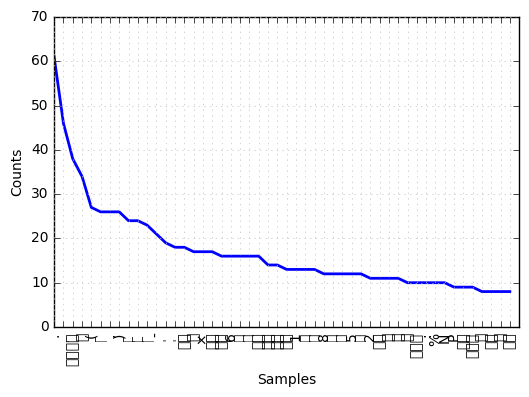

In [37]:
ko.plot(50)     # Plot sorted frequency of top 50 tokens

In [64]:
from matplotlib import pylab
pylab.show = lambda: pylab.savefig('some_filename.png')

In [22]:
ko.count('초등학교') # 단어의 등장 횟수 카운트

6

In [23]:
ko.concordance('초등학교') # 용어 색인

Displaying 6 of 6 matches:
 ․ 김정훈 김학송 의원 ( 10 인 ) 제안 이유 및 주요 내용 초등학교 저학년 의 경우 에도 부모 의 따뜻한 사랑 과 보살핌 이 필요 한
 을 할 수 있는 자녀 의 나이 는 만 6 세 이하 로 되어 있어 초등학교 저학년 인 자녀 를 돌보기 위해서 는 해당 부모님 은 일자리 를 
 다 . 제 63 조제 2 항제 4 호 중 “ 만 6 세 이하 의 초등학교 취학 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 
 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 에는 초등학교 2 학년 이하 를 말한 다 ) 의 자녀 를 ” 로 한 다 . 부 
 . ∼ 3 . ( 현행 과 같 음 ) 4 . 만 6 세 이하 의 초등학교 취 4 . 만 8 세 이하 ( 취학 중인 경우 학 전 자녀 를 양
세 이하 ( 취학 중인 경우 학 전 자녀 를 양육 하기 위하 에는 초등학교 2 학년 이하 를 여 필요하거 나 여자 공무원 이 말한 다 ) 의


In [24]:
ko.similar('자녀') # 비슷한 맥락에서 쓰인 단어

논의


In [25]:
ko.collocations() # 연어(함께 자주 등장하는 단어)

초등학교 저학년; 육아휴직 대상자


# Tagging and chunking

## 1. POS tagging 

__Open class:__ nouns, non-modal verbs, adjectives, adverbs<br>
<br>
__Closed class:__ prepositions, modal verbs, conjunctions, particles, determiners, pronouns
<br>
##### Penn Treebank tagset 

* ambiguity (동음이의어)
* French pronunciation

### 3가지 주요 테크닉 

1. rule-based
2. machine learning (CRF, maximum entropy, Markov models)
3. transformation-based

In [26]:
from konlpy.tag import Twitter; t = Twitter()
tags_ko = t.pos("작고 노란 강아지가 페르시안 고양이에게 짖었다")

텍스트에 태깅하는 방법에는 여러가지가 있지만 POS(품사) 태깅을 통해 분석을 해보겠다. 문서 전체에 태깅을 하면 오래 걸리니 하나의 문장에 대해서 진행하겠음!

In [27]:
pprint(tags_ko)

[(작고, Noun),
 (노란, Adjective),
 (강아지, Noun),
 (가, Josa),
 (페르시안, Noun),
 (고양이, Noun),
 (에게, Josa),
 (짖었, Noun),
 (다, Josa)]


## 2. Noun phrase chunking 

구절을 덩어리로 뽑아내는 것. (ex> 형용사 + 명사) 예쁜 얼굴

__nlitk.RegexpParser()__를 이용해 청킹을 해보겠다..!

In [99]:
parser_ko = nltk.RegexpParser("NP: {<Adjective>*<Noun>*}")
chunks_ko = parser_ko.parse(tags_ko)
#chunks_ko.draw()

In [28]:
bigram_ko = list(nltk.bigrams(tags_ko))

In [29]:
pprint(bigram_ko)

[((작고, Noun), (노란, Adjective)),
 ((노란, Adjective), (강아지, Noun)),
 ((강아지, Noun), (가, Josa)),
 ((가, Josa), (페르시안, Noun)),
 ((페르시안, Noun), (고양이, Noun)),
 ((고양이, Noun), (에게, Josa)),
 ((에게, Josa), (짖었, Noun)),
 ((짖었, Noun), (다, Josa))]


In [30]:
for p,f in bigram_ko:
    result = ""
    if (p[1] =='Adjective') & (f[1] == 'Noun'):
        result = p[0] + " " + f[0]
        pprint(result)

노란 강아지


# Named Entity Recognition

Named entities are phrases that contain the names of
persons, organizations, locations, times, and quatities.

### 1. Rule based 

In [31]:
import re

In [32]:
example1 = "나는 오늘도 파이썬을 공부한다."
example2 = "오늘도 고기를 먹었다."

In [33]:
def getObject(sentence):
    checker1 = re.compile('[가-힣]+을')
    checker2 = re.compile('[가-힣]+를')
    
    c1 = checker1.search(sentence)
    c2 = checker2.search(sentence)
    
    if (c1 != None): return c1.group()[:-1]
    elif(c2 != None): return c2.group()[:-1]
    else: return False

In [34]:
pprint(getObject(example1))
pprint(getObject(example2))

파이썬
고기


### 2. CRF 

In [31]:
from nltk.tag import StanfordNERTagger
st = StanfordNERTagger('english.all.3class.distsim.crf.ser.gz') 
st.tag('Rami Eid is studying at Stony Brook University in NY'.split()) 

LookupError: 

===========================================================================
  NLTK was unable to find stanford-ner.jar! Set the CLASSPATH
  environment variable.

  For more information, on stanford-ner.jar, see:
    <http://nlp.stanford.edu/software>
===========================================================================

In [122]:
[('Rami', 'PERSON'), ('Eid', 'PERSON'), ('is', 'O'), ('studying', 'O'),
 ('at', 'O'), ('Stony', 'ORGANIZATION'), ('Brook', 'ORGANIZATION'),
 ('University', 'ORGANIZATION'), ('in', 'O'), ('NY', 'LOCATION')]

[(u'Rami', u'PERSON'),
 (u'Eid', u'PERSON'),
 (u'is', u'O'),
 (u'studying', u'O'),
 (u'at', u'O'),
 (u'Stony', u'ORGANIZATION'),
 (u'Brook', u'ORGANIZATION'),
 (u'University', u'ORGANIZATION'),
 (u'in', u'O'),
 (u'NY', u'LOCATION')]

https://ko.wikipedia.org/wiki/%EC%A1%B0%EA%B1%B4%EB%B6%80_%EB%AC%B4%EC%9E%91%EC%9C%84%EC%9E%A5

### 3. HMM 

### The Noisy Channel Model 

__Example__: <br>
* Input: 쓰여진 글(Written) (X)
* Encoder: input을 혼동(X->Y)
* Output: 발화된 말(Y)

<br>
<br>
__More examples__: <br>
* 문법적 실수
* English to bitmaps(characters)

<br>
<br>
__P(X,Y) = P(X)P(Y|X)__